# Final Capstone Project

This is the notebook in which the final capstone will be developed. The activity consists in getting a Wikipedia table with the list of Canada's post codes and using K-means to clusterise the neighbourhoods. 

The first thing to do is to install the packages needed to run the analysis:

In [1]:
#!conda install -c conda-forge geopy --yes

In [2]:
#pip install folium

In [3]:
#conda update -n base -c defaults conda

In [4]:
#pip install beautifulsoup4

In [5]:
#pip install geocoder

Importing the modules:

In [6]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML
from pandas.io.json import json_normalize
import folium

In [7]:
import geocoder
import requests
from bs4 import BeautifulSoup

The cell below is an contingency in case of not scraping the Wikipedia table from the website.

In [8]:
#path = r'C:\Users\Andre\Documents\Cursos\IBM\Final capstone\canada.xlsx'
#c_df = pd.read_excel(path) # importing excel file

Let's get the Canada's Postal Code Table and see how it looks like:

In [9]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
c_df = pd.read_html(url, header=0)[0]

In [10]:
c_df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [11]:
c_df.shape

(180, 3)

We see that ther is a lot of cells with "Not Assigned" in them. Let's clean them up:

In [12]:
n_a = 'Not assigned'

In [13]:
c_df = c_df[c_df.Borough != n_a]

In [14]:
c_df.shape

(103, 3)

Tried to get the coordinates using geocoder, with no success. Instead, I used the CSV file.

In [15]:
'''
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
    g = geocoder.google('{}, Toronto, Ontario'.format(c_df['Postal Code']))
    lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]'''

"\nlat_lng_coords = None\n\n# loop until you get the coordinates\nwhile(lat_lng_coords is None):\n    g = geocoder.google('{}, Toronto, Ontario'.format(c_df['Postal Code']))\n    lat_lng_coords = g.latlng\n\nlatitude = lat_lng_coords[0]\nlongitude = lat_lng_coords[1]"

In [16]:
latlon = pd.read_csv(r'C:\Users\Andre\Documents\Cursos\IBM\Final capstone\Geospatial_Coordinates.csv')

In [17]:
latlon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [18]:
c_df = c_df.merge(latlon, on = 'Postal Code')

In [19]:
c_df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


For the exercise I got Toronto as an example. Listed boroughs and neighbourhoods

In [20]:
c_tor = c_df[c_df.Borough.str.contains('Toronto')]
c_tor.head(20)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [21]:
print('The following dataframe has {} boroughs and {} neighbourhoods'.format(len(c_tor['Borough'].unique()),c_tor.shape[0]))

The following dataframe has 4 boroughs and 39 neighbourhoods


Findind Toronto in the world:

In [22]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [23]:
latlon_array = c_tor[['Latitude','Longitude']].to_numpy()

In [24]:
latlon_array

array([[ 43.6542599, -79.3606359],
       [ 43.6623015, -79.3894938],
       [ 43.6571618, -79.3789371],
       [ 43.6514939, -79.3754179],
       [ 43.6763574, -79.2930312],
       [ 43.6447708, -79.3733064],
       [ 43.6579524, -79.3873826],
       [ 43.669542 , -79.4225637],
       [ 43.6505712, -79.3845675],
       [ 43.6690051, -79.4422593],
       [ 43.6408157, -79.3817523],
       [ 43.6479267, -79.4197497],
       [ 43.6795571, -79.352188 ],
       [ 43.6471768, -79.3815764],
       [ 43.6368472, -79.4281914],
       [ 43.6689985, -79.3155716],
       [ 43.6481985, -79.3798169],
       [ 43.6595255, -79.340923 ],
       [ 43.7280205, -79.3887901],
       [ 43.7116948, -79.4169356],
       [ 43.7127511, -79.3901975],
       [ 43.6969476, -79.4113072],
       [ 43.6616083, -79.4647633],
       [ 43.7153834, -79.4056784],
       [ 43.6727097, -79.4056784],
       [ 43.6489597, -79.456325 ],
       [ 43.7043244, -79.3887901],
       [ 43.6626956, -79.4000493],
       [ 43.6515706,

Toronto is composed of four big boroughs, with 39 neighbourhoods. Let's show the neighbourhoods in the map. 

In [25]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(c_tor['Latitude'], c_tor['Longitude'], c_tor['Borough'], c_tor['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
# Showing map   
map_toronto

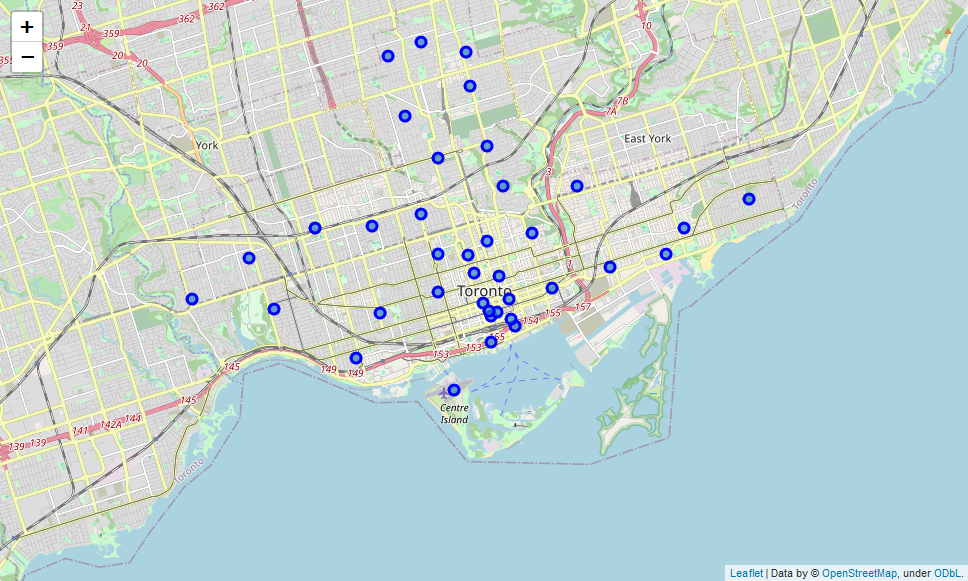

It is hard to visualize the boroughs in this map. So we are going to gather the neighbourhoods in four clusters, and we are going to use K-means to do this.

In [26]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

C:\Users\Andre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Fitting and getting the labels in the model:

In [27]:
k_means.fit(latlon_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 0, 3, 1, 0, 3, 1, 0, 1, 2, 2, 2, 2,
       3, 2, 0, 3, 2, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1])

In [29]:
k_means_labels.shape

(39,)

Determining the centers of the clusters

In [30]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 43.6547639 , -79.38308287],
       [ 43.66943648, -79.32465436],
       [ 43.70563855, -79.39811351],
       [ 43.65506566, -79.44547176]])

In [31]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [32]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around Toronto
# defining the colors
x = np.arange(4)
colors_array = cm.rainbow(np.linspace(0, 1, len(x)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
tool_tip = {0:'West Toronto',1:'Downtown Toronto', 2: 'Central Toronto', 3: 'East Toronto'}

# add a orange circle marker to represent the clusters centers

for cen_1, cen_2 in k_means_cluster_centers:
    folium.CircleMarker([cen_1, cen_2],
                        radius=6,color='orange',
                        popup='Current Location',
                        fill = True,
                        fill_color = 'orange',
                        fill_opacity = 1).add_to(venues_map)

# add the regions at the map
for post, lat, lng, label, neighbourhood in zip(c_tor['Postal Code'],
                                                      latlon_array[:,0],
                                                      latlon_array[:,1],
                                                      k_means_labels,
                                                      c_tor['Neighbourhood']):
    folium.CircleMarker([lat, lng],
                        radius=5,
                        tooltip = post + ', ' + tool_tip[label] + ' - ' + neighbourhood,
                        color= rainbow[label],
                        popup=label,
                        fill = True,
                        fill_color=rainbow[label],
                        fill_opacity=.5).add_to(venues_map)

# display map
venues_map

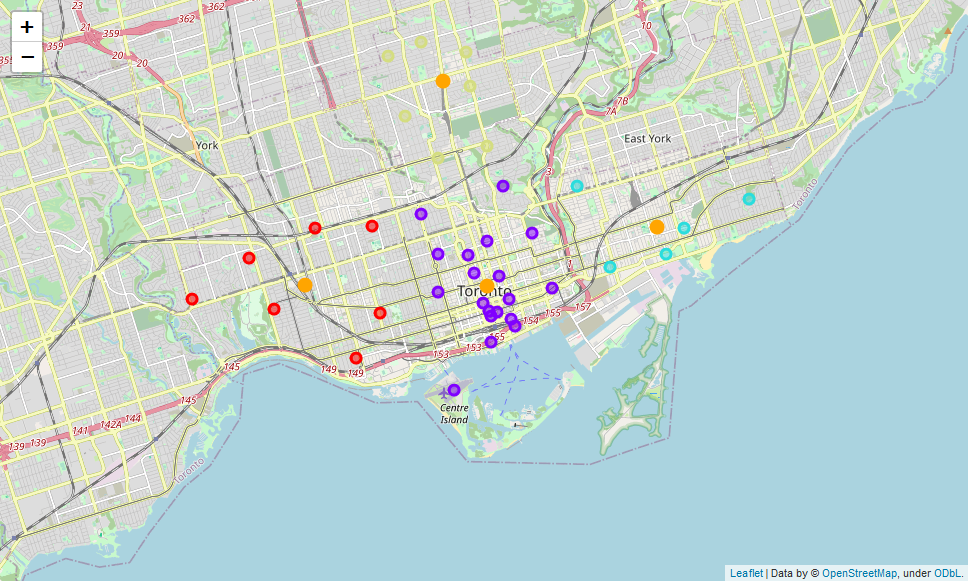

Let's compare the bouroughs in the table and the clusters:

In [33]:
compare = c_tor.groupby(['Borough'])['Postal Code'].count()
compare = compare.sort_values(ascending = False)

In [34]:
ar_k = np.array(np.unique(k_means_labels, return_counts=True)).T

In [35]:
print(compare)
print(-np.sort(-ar_k[:,1]))

Borough
Downtown Toronto    19
Central Toronto      9
West Toronto         6
East Toronto         5
Name: Postal Code, dtype: int64
[19  8  7  5]


As we can see, the model could cluster with a high precision. Let's calculate the precision:

$$ \frac{Tp}{Tp + Fp} $$

In [36]:
precision = (19+8+6+5)/(19+8+6+5+1)
print(precision)

0.9743589743589743


It means that the model has a precision of 97,4%